#IMPORTING LIBRARIES AND DATA LOADING



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

zip_file_path = '/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
zip_ref.close()

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pyarrow.parquet as pq

train_df = pd.read_parquet('/content/train_final.parquet')
test_df = pd.read_parquet('/content/test_final.parquet')
sample_sub_df = pd.read_parquet('/content/submission_sample_final.parquet')

#PREPROCCESSING THE DATA

In [ ]:
def map_carrier_to_numeric(carrier):
    if carrier == "VODAFONE TR":
        return 0
    elif carrier == "TURK TELEKOM":
        return 1
    elif carrier == "TURKCELL":
        return 2
    else:
        return 3

def map_carrier_column_to_numeric(df, column_name):
    new_carrier = df[column_name].apply(map_carrier_to_numeric)
    df[column_name] = new_carrier
    return df

train_df = map_carrier_column_to_numeric(train_df, "carrier")
train_df = pd.get_dummies(train_df, columns=["carrier"], prefix=["carrier"])

test_df = map_carrier_column_to_numeric(test_df, "carrier")
test_df = pd.get_dummies(test_df, columns=["carrier"], prefix=["carrier"])

train_df.head(3)

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_45,feature_46,feature_47,feature_48,feature_49,target,carrier_0,carrier_1,carrier_2,carrier_3
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,Apple,-1.197737,1.113360,-1.123334,-0.263580,...,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5",1,0,0,0
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,samsung,-2.336352,2.567766,-0.494908,0.949101,...,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4",0,0,1,0
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,Redmi,-2.561455,2.061736,-0.184511,1.062306,...,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4",0,1,0,0


In [ ]:
def map_devicebrand_to_numeric(devicebrand):
    if devicebrand == "Apple":
        return 0
    elif devicebrand == "samsung":
        return 1
    elif devicebrand == "Redmi":
        return 2
    elif devicebrand == "HUAWEI":
        return 3
    elif devicebrand == "xiaomi":
        return 4
    elif devicebrand == "POCO":
        return 5
    elif devicebrand == "OPPO":
        return 6
    else:
        return 7

def map_devicebrand_column_to_numeric(df, column_name):
    new_devicebrand = df[column_name].apply(map_devicebrand_to_numeric)
    df[column_name] = new_devicebrand
    return df

train_df = map_devicebrand_column_to_numeric(train_df, "devicebrand")
train_df = pd.get_dummies(train_df, columns=["devicebrand"], prefix=["devicebrand"])

test_df = map_devicebrand_column_to_numeric(test_df, "devicebrand")
test_df = pd.get_dummies(test_df, columns=["devicebrand"], prefix=["devicebrand"])

train_df.head(3)

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,carrier_2,carrier_3,devicebrand_0,devicebrand_1,devicebrand_2,devicebrand_3,devicebrand_4,devicebrand_5,devicebrand_6,devicebrand_7
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,-1.197737,1.113360,-1.123334,-0.263580,2.161242,...,0,0,1,0,0,0,0,0,0,0
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,-2.336352,2.567766,-0.494908,0.949101,3.567557,...,1,0,0,1,0,0,0,0,0,0
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,-2.561455,2.061736,-0.184511,1.062306,4.197788,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_df.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,...,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,11.311561,432.781818,197.904016,102.381759,-1.824932,1.948002,-0.014231,-0.270988,3.428983,2.314612,...,0.053164,0.237674,0.793331,0.060064,0.412742,0.201002,0.691097,0.043935,0.311072,0.249083
std,0.732301,429.834018,169.474603,80.533643,0.706014,0.742521,0.855615,1.001878,0.886168,0.765429,...,0.224361,0.425661,0.404918,0.237607,0.492330,0.400751,0.462043,0.204951,0.462935,0.432484
min,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,-1.572397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,181.540000,91.886000,53.746000,-2.290048,1.443627,-0.560076,-0.950880,2.891524,1.805311,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,306.947000,144.874000,75.415000,-1.840876,1.934019,0.005703,-0.337732,3.503459,2.316267,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,537.064000,241.504000,119.032000,-1.379623,2.431059,0.559322,0.330430,4.050990,2.825116,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,12.000000,13567.046000,3275.128000,1476.077000,2.137354,6.574112,4.055067,5.021944,6.272530,5.775909,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_10_train_df = train_df[train_df['month'] == 10]
X_month_11_train_df  = train_df[train_df['month'] == 11]
X_month_12_train_df  = train_df[train_df['month'] == 12]

X_month_11_train_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
15131,ff45f2c3fe6a68d18c42c94e1,11,7437.251,328.532,262.480,-3.400307,2.738383,-0.960845,0.049726,3.887482,...,0,0,1,0,0,0,1,0,1,0
15132,1d87141dee64e97858c159c5f,11,6085.168,208.117,92.453,-1.183897,1.352622,-0.928442,-1.059753,4.038740,...,0,0,1,0,1,0,0,0,1,0
15133,181f244db86e2687697a5a05f,11,5609.142,127.698,125.536,-2.018139,1.486588,-1.010452,-0.638951,4.674849,...,0,0,1,0,1,0,0,0,1,0
15134,12ba200c8173df6c8b77b93e8,11,5529.106,52.579,40.446,-0.997287,3.202267,-0.132064,-0.958099,4.224952,...,0,0,1,0,1,0,0,0,1,0
15135,db1b321cd252db89489cfc62f,11,5488.202,103.305,74.565,-2.081523,1.859435,-0.554981,0.220907,3.244102,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
X_month_10_train_df.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,15131.0,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,...,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000
mean,10.0,350.863220,167.207179,91.950169,-1.695896,1.722985,-0.088710,-0.674492,3.411214,2.269553,...,0.058820,0.286828,0.772520,0.064834,0.515366,0.255700,0.629965,0.067808,0.110766,0.296213
std,0.0,301.981525,132.954643,68.173635,0.711190,0.743443,0.846632,0.995024,0.907682,0.792240,...,0.235295,0.452296,0.419219,0.246240,0.499780,0.436268,0.482830,0.251424,0.313852,0.456601
min,10.0,42.846000,40.547000,40.005000,-4.906884,-1.190684,-3.913457,-4.024894,-1.734715,-0.925947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.0,157.911500,84.028500,51.496000,-2.165350,1.217219,-0.640052,-1.354289,2.864063,1.742673,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.0,260.696000,125.872000,69.431000,-1.708372,1.702667,-0.084536,-0.739433,3.491252,2.263402,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.0,449.019000,202.541500,105.964500,-1.245381,2.196551,0.469527,-0.071231,4.045689,2.796520,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,10.0,5245.571000,3275.128000,1183.204000,2.137354,5.351057,3.393545,4.127292,6.250954,5.586730,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_11_train_df.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,34485.0,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,...,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000
mean,11.0,421.777495,196.696239,102.560664,-1.798948,1.932764,-0.001302,-0.345679,3.393313,2.277141,...,0.053849,0.245556,0.792142,0.038857,0.399304,0.183036,0.723184,0.044454,0.319472,0.253994
std,0.0,382.431530,165.040477,79.878791,0.709124,0.745900,0.852730,0.987858,0.892311,0.770828,...,0.225724,0.430423,0.405781,0.193258,0.489762,0.386702,0.447431,0.206105,0.466279,0.435301
min,11.0,45.344000,40.321000,40.004000,-4.999651,-1.057182,-4.988702,-4.205721,-2.057158,-1.138179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.0,183.167000,92.203000,54.052000,-2.266328,1.425881,-0.545833,-1.023522,2.849846,1.764328,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.0,308.622000,145.051000,75.945000,-1.813561,1.915649,0.019954,-0.418638,3.460863,2.278218,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.0,533.720000,240.376000,120.131000,-1.348417,2.413106,0.569695,0.244293,4.014705,2.793287,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,11.0,7437.251000,2742.308000,1476.077000,1.851254,6.574112,4.055067,5.021944,6.154907,5.607701,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_12_train_df.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,44433.0,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,...,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000
mean,12.0,469.218575,209.294739,105.795232,-1.889040,2.036454,0.001098,-0.075612,3.462718,2.359037,...,0.050706,0.214818,0.801341,0.074899,0.388225,0.196318,0.687012,0.035402,0.372763,0.229222
std,0.0,492.749483,182.162814,84.525955,0.694449,0.722319,0.859586,0.965488,0.872626,0.749329,...,0.219398,0.410701,0.398995,0.263232,0.487352,0.397216,0.463715,0.184795,0.483545,0.420337
min,12.0,41.850000,40.231000,40.001000,-5.009604,-1.033760,-4.441456,-3.977470,-1.695380,-1.572397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.0,189.602000,95.531000,54.403000,-2.344318,1.546047,-0.541976,-0.737180,2.932805,1.862184,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.0,324.235000,151.765000,77.300000,-1.906997,2.027112,0.026923,-0.149811,3.541774,2.359835,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.0,565.213000,256.175000,123.018000,-1.456124,2.508697,0.580636,0.494542,4.077867,2.859592,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,12.0,13567.046000,2865.722000,1316.209000,1.722789,5.190989,3.163662,4.509931,6.272530,5.775909,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


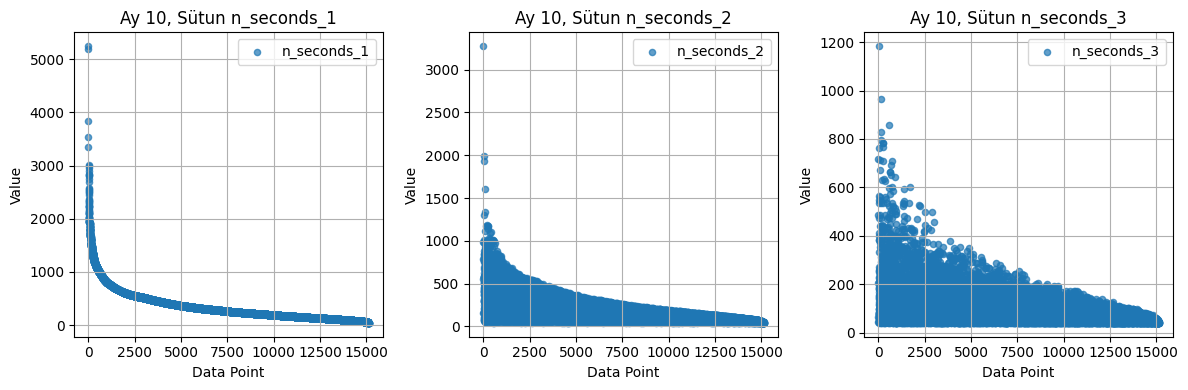

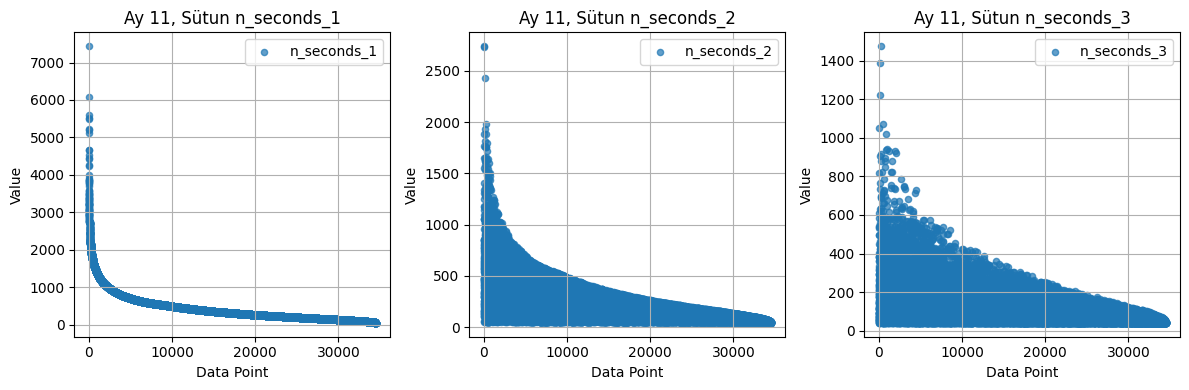

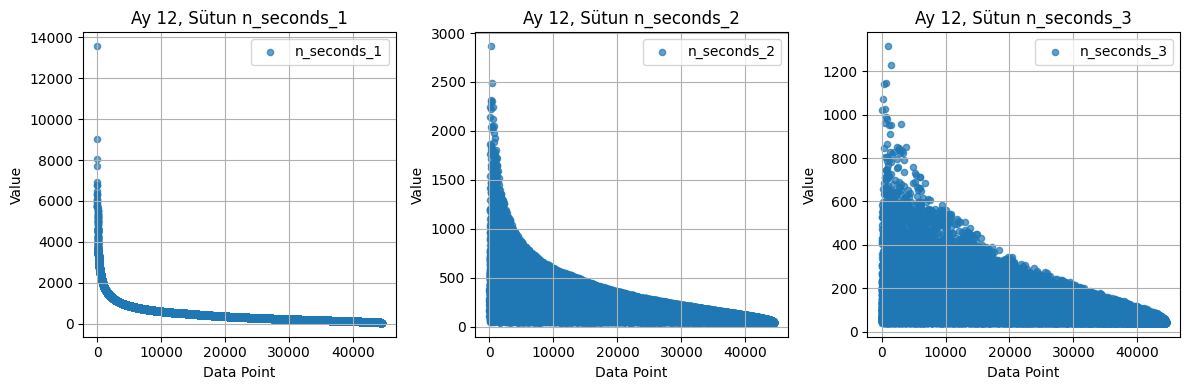

In [ ]:
import matplotlib.pyplot as plt

columns = ["n_seconds_1","n_seconds_2","n_seconds_3"]

def plot_scatter_matrix(train_df, month, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(12, 4))  # Adjust the figure size

    for j, column in enumerate(columns):
        ax = axes[j]
        data = train_df[train_df["month"] == month]
        x = range(len(data))
        y = data[column]
        ax.scatter(x, y, label=column, alpha=0.7, s=20)  # Adjust alpha and point size
        ax.set_title(f"Ay {month}, Sütun {column}")
        ax.set_xlabel("Data Point")
        ax.set_ylabel("Value")
        ax.grid(True)  # Add gridlines
        ax.legend()  # Add legend

    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter_matrix(X_month_10_train_df, 10, columns)
plot_scatter_matrix(X_month_11_train_df, 11, columns)
plot_scatter_matrix(X_month_12_train_df, 12, columns)



In [ ]:
X_month_10_train_df["n_seconds_1"] = X_month_10_train_df["n_seconds_1"][X_month_10_train_df["n_seconds_1"] < 3000]
X_month_10_train_df["n_seconds_2"] = X_month_10_train_df["n_seconds_2"][X_month_10_train_df["n_seconds_2"] < 1250]
X_month_10_train_df["n_seconds_3"] = X_month_10_train_df["n_seconds_3"][X_month_10_train_df["n_seconds_3"] < 800]

X_month_11_train_df["n_seconds_1"] = X_month_11_train_df["n_seconds_1"][X_month_11_train_df["n_seconds_1"] < 4000]
X_month_11_train_df["n_seconds_2"] = X_month_11_train_df["n_seconds_2"][X_month_11_train_df["n_seconds_2"] < 1500]
X_month_11_train_df["n_seconds_3"] = X_month_11_train_df["n_seconds_3"][X_month_11_train_df["n_seconds_3"] < 800]

X_month_12_train_df["n_seconds_1"] = X_month_12_train_df["n_seconds_1"][X_month_12_train_df["n_seconds_1"] < 7000]
X_month_12_train_df["n_seconds_2"] = X_month_12_train_df["n_seconds_2"][X_month_12_train_df["n_seconds_2"] < 2000]
X_month_12_train_df["n_seconds_3"] = X_month_12_train_df["n_seconds_3"][X_month_12_train_df["n_seconds_3"] < 1000]

X_month_10_train_df.dropna(how="any", inplace=True)
X_month_11_train_df.dropna(how="any", inplace=True)
X_month_12_train_df.dropna(how="any", inplace=True)

X_month_10_train_df = X_month_10_train_df.drop("month", axis=1)
X_month_11_train_df = X_month_11_train_df.drop("month", axis=1)
X_month_12_train_df = X_month_12_train_df.drop("month", axis=1)

X_month_11_train_df.head(3)

<ipython-input-13-1620e9441b15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_month_10_train_df["n_seconds_1"] = X_month_10_train_df["n_seconds_1"][X_month_10_train_df["n_seconds_1"] < 3000]
<ipython-input-13-1620e9441b15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_month_10_train_df["n_seconds_2"] = X_month_10_train_df["n_seconds_2"][X_month_10_train_df["n_seconds_2"] < 1250]
<ipython-input-13-1620e9441b15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,id,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
15146,129ef78c58f902dab9378c588,3988.301,654.837,221.147,-1.103186,2.272421,-0.878472,-0.156700,2.579419,2.821010,...,0,1,1,0,1,0,0,0,0,0
15147,02de67e60ef658a96f7d85c75,3913.760,858.258,316.125,-2.932091,2.911315,-0.036543,-0.630924,3.478452,0.656662,...,0,0,1,0,1,0,1,0,0,0
15148,85618a76be535eb669ed94dfc,3875.117,473.717,174.001,-1.487058,1.071441,-0.382344,-1.557116,2.521288,2.320316,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
X_month_10_train_df.describe()

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,15118.00000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,...,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000,15118.000000
mean,348.73910,166.225136,91.601495,-1.695615,1.722699,-0.088701,-0.674914,3.411154,2.268973,0.815756,...,0.058870,0.286810,0.772457,0.064890,0.515412,0.255656,0.630044,0.067734,0.110597,0.296402
std,290.76321,126.823610,66.207283,0.711135,0.743357,0.846662,0.994675,0.907894,0.792061,0.710064,...,0.235389,0.452287,0.419260,0.246339,0.499779,0.436243,0.482809,0.251297,0.313642,0.456685
min,42.84600,40.547000,40.005000,-4.906884,-1.190684,-3.913457,-4.024894,-1.734715,-0.925947,-2.568583,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.83025,84.010750,51.480500,-2.164971,1.217110,-0.639928,-1.354330,2.864045,1.742415,0.382193,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,260.46700,125.788000,69.412500,-1.708356,1.702318,-0.084553,-0.739746,3.491201,2.263099,0.854987,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,448.57600,202.357250,105.878000,-1.245324,2.196366,0.469101,-0.071705,4.045706,2.795363,1.290874,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2996.12200,1183.247000,793.844000,2.137354,5.351057,3.393545,4.127292,6.250954,5.586730,3.906580,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_11_train_df.describe()

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,...,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000
mean,417.578623,194.773275,101.890271,-1.798549,1.932751,-0.000785,-0.346029,3.393420,2.277323,0.765344,...,0.053859,0.245650,0.791854,0.038927,0.399587,0.183250,0.723325,0.044534,0.318595,0.254278
std,364.164348,156.649578,76.485431,0.708974,0.746011,0.852559,0.987576,0.892281,0.770810,0.705605,...,0.225743,0.430478,0.405988,0.193425,0.489821,0.386877,0.447361,0.206282,0.465938,0.435461
min,45.344000,40.321000,40.004000,-4.999651,-1.057182,-4.988702,-4.205721,-2.057158,-1.138179,-3.357962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,182.983000,92.156000,54.033000,-2.265908,1.425845,-0.545547,-1.023378,2.850012,1.764517,0.329382,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307.953000,144.876000,75.855000,-1.813429,1.915791,0.020395,-0.418987,3.460904,2.278428,0.799051,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,532.746000,239.680500,119.887500,-1.348045,2.413228,0.569907,0.244041,4.014693,2.793665,1.240103,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,3988.301000,1487.323000,788.823000,1.851254,6.574112,4.055067,5.021944,6.154907,5.607701,3.399292,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_12_train_df.describe()

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,...,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000,44407.000000
mean,467.264775,208.430993,105.579612,-1.889123,2.036442,0.001115,-0.075623,3.462668,2.359018,0.727771,...,0.050690,0.214831,0.801248,0.074921,0.388317,0.196410,0.687099,0.035422,0.372509,0.229243
std,481.814905,177.757501,83.409456,0.694394,0.722218,0.859529,0.965568,0.872647,0.749308,0.677690,...,0.219367,0.410710,0.399066,0.263266,0.487373,0.397287,0.463680,0.184847,0.483478,0.420351
min,41.850000,40.231000,40.001000,-5.009604,-1.033760,-4.441456,-3.977470,-1.695380,-1.572397,-4.834940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.553500,95.501000,54.399000,-2.344377,1.546012,-0.541560,-0.737176,2.932890,1.862169,0.308287,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,324.024000,151.698000,77.278000,-1.906733,2.027112,0.026972,-0.149871,3.541770,2.359890,0.761328,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,564.736500,255.971000,122.899500,-1.456121,2.508776,0.580447,0.494524,4.077843,2.859611,1.182789,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,6943.225000,1982.327000,990.059000,1.722789,5.190989,3.163662,4.509931,6.272530,5.775909,3.422774,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_month_10 = X_month_10_train_df.drop(columns=["id",'menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])
y_month_10 = X_month_10_train_df[['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']]/3

X_month_11 = X_month_11_train_df.drop(columns=["id",'menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])
y_month_11 = X_month_11_train_df[['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']]/3

X_month_12 = X_month_12_train_df.drop(columns=["id",'menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])
y_month_12 = X_month_12_train_df[['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']]/3

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ["n_seconds_1","n_seconds_2","n_seconds_3",
                        "feature_0","feature_1","feature_2","feature_3","feature_4","feature_5",
                        "feature_6","feature_7","feature_8","feature_9","feature_10","feature_11",
                        "feature_12","feature_13","feature_14","feature_15","feature_16","feature_17",
                        "feature_18","feature_19","feature_20","feature_21","feature_22","feature_23",
                        "feature_24","feature_25","feature_26","feature_27","feature_28","feature_29",
                        "feature_30","feature_31","feature_32","feature_33","feature_34","feature_35",
                        "feature_36","feature_37","feature_38","feature_39","feature_40","feature_41",
                        "feature_42","feature_43","feature_44","feature_45","feature_46","feature_47",
                        "feature_48","feature_49"]

from sklearn.preprocessing import MinMaxScaler

def min_max_scale_dataframe(dataframe, columns_to_normalize):
    scaler = MinMaxScaler()
    dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
    return dataframe

X_month_10 = min_max_scale_dataframe(X_month_10, columns_to_normalize)
X_month_11 = min_max_scale_dataframe(X_month_11, columns_to_normalize)
X_month_12 = min_max_scale_dataframe(X_month_12, columns_to_normalize)

X_month_10.head(3)

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,carrier_2,carrier_3,devicebrand_0,devicebrand_1,devicebrand_2,devicebrand_3,devicebrand_4,devicebrand_5,devicebrand_6,devicebrand_7
6,1.000000,0.411847,0.151828,0.232012,0.538472,0.597309,0.390264,0.560442,0.527628,0.536855,...,1,0,0,0,0,1,0,0,0,0
7,0.985674,0.467772,0.673792,0.613736,0.390789,0.477537,0.440134,0.462633,0.390687,0.532282,...,0,0,0,1,0,0,0,0,0,0
8,0.964118,0.333167,0.223992,0.541714,0.394593,0.661331,0.458279,0.572454,0.619430,0.491664,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train_month_10, X_test_month_10, y_train_month_10, y_test_month_10 = train_test_split(X_month_10, y_month_10, test_size=0.2, random_state=42)
X_train_month_11, X_test_month_11, y_train_month_11, y_test_month_11 = train_test_split(X_month_11, y_month_11, test_size=0.2, random_state=42)
X_train_month_12, X_test_month_12, y_train_month_12, y_test_month_12 = train_test_split(X_month_12, y_month_12, test_size=0.2, random_state=42)

In [ ]:
X_train_month_10.shape

(12094, 65)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

X_train_reshaped_month_10 = X_train_month_10.to_numpy().reshape(X_train_month_10.shape[0], 1, 65, 1)
X_train_reshaped_month_11 = X_train_month_11.to_numpy().reshape(X_train_month_11.shape[0], 1, 65, 1)
X_train_reshaped_month_12 = X_train_month_12.to_numpy().reshape(X_train_month_12.shape[0], 1, 65, 1)

X_test_reshaped_month_10 = X_test_month_10.to_numpy().reshape(X_test_month_10.shape[0], 1, 65, 1)
X_test_reshaped_month_11 = X_test_month_11.to_numpy().reshape(X_test_month_11.shape[0], 1, 65, 1)
X_test_reshaped_month_12 = X_test_month_12.to_numpy().reshape(X_test_month_12.shape[0], 1, 65, 1)

# İlk ConvNet
input1 = Input(shape=(1, 65, 1))
x1 = Conv2D(512, (3, 3), activation='tanh',padding="same")(input1)
x1 = MaxPooling2D((1, 1))(x1)
x1 = Conv2D(256, (3, 3), activation='tanh',padding="same")(input1)
x1 = MaxPooling2D((1, 1))(x1)
x1 = Conv2D(128, (3, 3), activation='linear',padding="same")(input1)
x1 = MaxPooling2D((1, 1))(x1)
x1 = Flatten()(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dense(128, activation='relu')(x1)

# Ortak çıkış katmanı
final_output = Dense(9, activation='softmax')(x1)

# Modeli oluştur
model_month_10 = Model(inputs=input1, outputs=final_output)
model_month_11 = Model(inputs=input1, outputs=final_output)
model_month_12 = Model(inputs=input1, outputs=final_output)

# Modeli derleme
model_month_10.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_month_11.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_month_12.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_month_10.fit(x = X_train_reshaped_month_10,
          y = y_train_month_10,
          epochs = 10,
          batch_size = 32)

Epoch 1/10
378/378 [==============================] - 3s 5ms/step - loss: 1.9328 - accuracy: 0.5461
Epoch 2/10
378/378 [==============================] - 2s 5ms/step - loss: 1.9058 - accuracy: 0.5122
Epoch 3/10
378/378 [==============================] - 2s 5ms/step - loss: 1.8947 - accuracy: 0.4831
Epoch 4/10
378/378 [==============================] - 2s 6ms/step - loss: 1.8898 - accuracy: 0.4777
Epoch 5/10
378/378 [==============================] - 3s 7ms/step - loss: 1.8845 - accuracy: 0.4702
Epoch 6/10
378/378 [==============================] - 2s 5ms/step - loss: 1.8809 - accuracy: 0.4711
Epoch 7/10
378/378 [==============================] - 2s 5ms/step - loss: 1.8774 - accuracy: 0.4567
Epoch 8/10
378/378 [==============================] - 2s 5ms/step - loss: 1.8744 - accuracy: 0.4644
Epoch 9/10
378/378 [==============================] - 2s 5ms/step - loss: 1.8715 - accuracy: 0.4533
Epoch 10/10
378/378 [==============================] - 2s 6ms/step - loss: 1.8686 - accuracy: 0.4581

In [ ]:
y_pred = model_month_10.predict(X_test_reshaped_month_10)
top3_indices = np.argsort(y_pred, axis=1)[:, -3:]
result = np.zeros_like(y_pred)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1

correct_rows = np.all(result == y_test_month_10*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

95/95 [==============================] - 0s 2ms/step
Accuracy: 0.1746031746031746


In [ ]:
model_month_11.fit(x = X_train_reshaped_month_11,
          y = y_train_month_11,
          epochs = 10,
          batch_size = 32)



















Epoch 1/10
861/861 [==============================] - 8s 8ms/step - loss: 1.8408 - accuracy: 0.4399
Epoch 2/10
861/861 [==============================] - 7s 8ms/step - loss: 1.8329 - accuracy: 0.4432
Epoch 3/10
861/861 [==============================] - 6s 7ms/step - loss: 1.8297 - accuracy: 0.4395
Epoch 4/10
861/861 [==============================] - 4s 5ms/step - loss: 1.8275 - accuracy: 0.4328
Epoch 5/10
861/861 [==============================] - 4s 5ms/step - loss: 1.8257 - accuracy: 0.4337
Epoch 6/10
861/861 [==============================] - 5s 6ms/step - loss: 1.8237 - accuracy: 0.4276
Epoch 7/10
861/861 [==============================] - 4s 5ms/step - loss: 1.8222 - accuracy: 0.4289
Epoch 8/10
861/861 [==============================] - 4s 5ms/step - loss: 1.8205 - accuracy: 0.4274
Epoch 9/10
861/861 [==============================] - 5s 5ms/step - loss: 1.8190 - accuracy: 0.4314
Epoch 10/10
861/861 [==============================] - 5s 6ms/step - loss: 1.8175 - accuracy: 0.4231

In [ ]:
y_pred = model_month_11.predict(X_test_reshaped_month_11)
top3_indices = np.argsort(y_pred, axis=1)[:, -3:]
result = np.zeros_like(y_pred)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1

correct_rows = np.all(result == y_test_month_11*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

216/216 [==============================] - 1s 2ms/step
Accuracy: 0.23558460421205518


In [ ]:
model_month_12.fit(x = X_train_reshaped_month_12,
          y = y_train_month_12,
          epochs = 10,
          batch_size = 32)

Epoch 1/10
1111/1111 [==============================] - 8s 6ms/step - loss: 1.8435 - accuracy: 0.4873
Epoch 2/10
1111/1111 [==============================] - 6s 5ms/step - loss: 1.8380 - accuracy: 0.4792
Epoch 3/10
1111/1111 [==============================] - 7s 6ms/step - loss: 1.8359 - accuracy: 0.4789
Epoch 4/10
1111/1111 [==============================] - 5s 5ms/step - loss: 1.8341 - accuracy: 0.4772
Epoch 5/10
1111/1111 [==============================] - 5s 5ms/step - loss: 1.8325 - accuracy: 0.4796
Epoch 6/10
1111/1111 [==============================] - 7s 6ms/step - loss: 1.8311 - accuracy: 0.4806
Epoch 7/10
1111/1111 [==============================] - 5s 5ms/step - loss: 1.8294 - accuracy: 0.4774
Epoch 8/10
1111/1111 [==============================] - 6s 6ms/step - loss: 1.8284 - accuracy: 0.4797
Epoch 9/10
1111/1111 [==============================] - 5s 5ms/step - loss: 1.8271 - accuracy: 0.4782
Epoch 10/10
1111/1111 [==============================] - 5s 5ms/step - loss: 1.826

In [ ]:
y_pred = model_month_12.predict(X_test_reshaped_month_12)
top3_indices = np.argsort(y_pred, axis=1)[:, -3:]
result = np.zeros_like(y_pred)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1

correct_rows = np.all(result == y_test_month_12*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

278/278 [==============================] - 1s 3ms/step
Accuracy: 0.24352623283044358
